# DS401 project: Merrina Lan

This is an extension of my Bio187 gene expression group project. We analyzed the effect of estrogen and high fat/high sugar diet on mice gene expression, using the data generated by Dr. Blythe's lab.

### First, I will use the same code to generate panda dataframes for the gene expression fold changes.

In [3]:
#Import the following Python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Import Blythe Lab datasets on multilevel fold change, estrogenfold change, and dietfold change

blythelabmulti = pd.read_csv('multi-levelfold-change.hypothalamus.csv', index_col = 0)
blythelabestrogen = pd.read_csv('estrogenfold-change.hypothalamus.csv', index_col = 0)
blythelabdiet = pd.read_csv('dietfold-change.hypothalamus.csv', index_col = 0)

In [4]:
#Isolate Blythe Lab estrogen fold change data's fold change and probability columns

blythelabestrogen = pd.read_csv('estrogenfold-change.hypothalamus.csv',index_col=0)
blythelabestrogen = blythelabestrogen.drop(columns = ['name', 'description', 'gene_id'])
blythelabestrogenprobsort = blythelabestrogen.sort_values(by='H.ppde', ascending=False)
blythelabestrogenprobsortc = blythelabestrogenprobsort.dropna(subset=['H.fc','H.ppde'])

#Create 3 new csvs from Blythe Lab estrogenfold change data isolated by different probability thresholds:

#1. High interest = estrogenfold change data with at least 75% (or .75) probability of being expressed

highinterestestrogen = blythelabestrogenprobsortc[blythelabestrogenprobsortc['H.ppde'] >= 0.75]
highinterestestrogen.to_csv('estrogen_high_interest_genes.csv')

#2. Medium interest = estrogenfold change data with at least 67% (or .67) probability of being expressed

med = blythelabestrogenprobsortc[blythelabestrogenprobsortc['H.ppde'] >= 0.33]
medinterestestrogen = med[med['H.ppde'] < 0.67]
medinterestestrogen.to_csv('estrogen_med_interest_genes.csv')

#3. Low interest = estrogenfold change data with less than 33% (or .33) probability of being expressed

lowinterestestrogen = blythelabestrogenprobsortc[blythelabestrogenprobsortc['H.ppde'] < 0.33]
lowinterestestrogen.to_csv('estrogen_low_interest_genes.csv')

In [5]:
#Isolate Blythe Lab dietfold change data's fold change and probability columns

blythelabdiet = pd.read_csv('dietfold-change.hypothalamus.csv', index_col = 0)
blythelabdiet = blythelabdiet.drop(columns = ['name', 'description', 'gene_id'])
blythelabdietprobsort = blythelabdiet.sort_values(by='H.ppde', ascending=False)
blythelabdietprobsortc = blythelabdietprobsort.dropna(subset=['H.fc','H.ppde'])

#Create 3 new csvs from Blythe Lab dietfold change data isolated by different probability thresholds:

#1. High interest = dietfold change data with at least 75% (or .75) probability of being expressed

highinterestdiet = blythelabdietprobsortc[blythelabdietprobsortc['H.ppde'] >= 0.75]
highinterestdiet.to_csv('diet_high_interest_genes.csv')

#2. Medium interest = dietfold change data with at least 67% (or .67) probability of being expressed

med = blythelabdietprobsortc[blythelabdietprobsortc['H.ppde'] >= 0.33]
medinterestdiet = med[med['H.ppde'] < 0.67]
medinterestdiet.to_csv('diet_med_interest_genes.csv')

#3. Low interest = dietfold change data with less than 33% (or .33) probability of being expressed

lowinterestdiet = blythelabdietprobsortc[blythelabdietprobsortc['H.ppde'] < 0.33]
lowinterestdiet.to_csv('diet_low_interest_genes.csv')

In [6]:
#Isolate Blythe Lab data with highest probability threshold with absolute fold change threshold of 2

sig_blythediet = highinterestdiet[(highinterestdiet['H.fc'] <= -2) | (highinterestdiet['H.fc'] >= 2)]
sig_blytheestrogen = highinterestestrogen[(highinterestestrogen['H.fc'] <= -2) | (highinterestestrogen['H.fc'] >= 2)]

#Make a set of the genes that overlap in the above datasets

set_sigblythediet = set(sig_blythediet.index)
set_sigblytheestrogen = set(sig_blytheestrogen.index)

overlap_high_interest_gene = set_sigblythediet.intersection(set_sigblytheestrogen)

#Make a set of the genes that are in either one of the datasets

high_interest_unique_gene = set(set_sigblythediet | set_sigblytheestrogen)

#Make friendly printout of our sets

print('Genes with PPDE Higher than 0.75 and Absolute Dietfold Change Higher than 2: ', set_sigblythediet)
print('')
print('Genes with PPDE Higher than 0.75 and Absolute Estrogenfold Change Higher than 2: ', set_sigblytheestrogen)
print('')
print('Genes with PPDE Higher than 0.75 and Absolute Fold change Higher than 2: ', overlap_high_interest_gene)
print('')
print('Unique Genes with High Prob and FC from both Dietfold change and Estrogenfold change: ', high_interest_unique_gene)

Genes with PPDE Higher than 0.75 and Absolute Dietfold Change Higher than 2:  {'LOC102554034', 'Srm', 'Prl', 'M6pr', 'Stra8', 'Epyc'}

Genes with PPDE Higher than 0.75 and Absolute Estrogenfold Change Higher than 2:  {'Prl', 'M6pr', 'Stra8', 'LOC100910979', 'Tshb', 'Cpne1'}

Genes with PPDE Higher than 0.75 and Absolute Fold change Higher than 2:  {'Prl', 'M6pr', 'Stra8'}

Unique Genes with High Prob and FC from both Dietfold change and Estrogenfold change:  {'LOC102554034', 'Srm', 'Prl', 'M6pr', 'Stra8', 'Epyc', 'LOC100910979', 'Tshb', 'Cpne1'}


In [7]:
#Add estrogenfold data to multilevel dataframe with intuitive column heads

blythelabmulti['E.H.fc'] = blythelabestrogen['H.fc']
blythelabmulti['E.H.ppde'] = blythelabestrogen['H.ppde']

#add dietfold data to multilevel dataframe with intuitive column heads

blythelabmulti['D.H.fc'] = blythelabdiet['H.fc']
blythelabmulti['D.H.ppde'] = blythelabdiet['H.ppde']

#Export new csv file so we have all data in one place

blythelabmulti.to_csv('all genes with data from estrogen and diet.csv')

#drop rows with none values
blythelabmulti=blythelabmulti.dropna(how='any')

blythelabmulti

,H.log2(c.ovx/c.ove),H.log2(c.ovx/h.ovx),H.log2(c.ovx/h.ove),H.log2(c.ove/h.ovx),H.log2(c.ove/h.ove),H.log2(h.ovx/h.ove),name,E.H.fc,E.H.ppde,D.H.fc,D.H.ppde
A1bg,0.763271,-0.603784,6.813250,-1.367055,6.049979,7.417034,alpha-1-B glycoprotein,2.074910,8.431414e-17,0.056063,5.381117e-04
A1cf,0.000000,-4.920363,0.000000,-4.920363,0.000000,4.920363,APOBEC1 complementation factor,3.967236,4.552893e-16,-3.967236,1.965365e-15
A2m,-0.588480,-0.824091,-0.812188,-0.235611,-0.223708,0.011903,alpha-2-macroglobulin,-0.234561,2.714252e-04,-0.494112,2.154725e-02
A3galt2,-0.023365,0.021730,-0.075536,0.045095,-0.052171,-0.097266,"alpha 1,3-galactosyltransferase 2",-0.060510,5.324113e-18,-0.015993,1.966212e-17
A4galt,0.201774,-2.169328,-0.465864,-2.371102,-0.667638,1.703464,"alpha 1,4-galactosyltransferase",1.288617,4.294725e-03,-1.653003,1.701631e-02
...,...,...,...,...,...,...,...,...,...,...,...
mrpl11,-0.071539,-0.031620,0.071420,0.039920,0.142960,0.103040,mitochondrial ribosomal protein L11,0.014067,1.126814e-04,0.055194,2.674650e-04
mrpl24,-0.054844,-0.031909,0.097012,0.022935,0.151855,0.128921,mitochondrial ribosomal protein L24,0.035130,1.304464e-04,0.058794,2.636483e-04
mrpl9,-0.144997,-0.020277,0.165004,0.124720,0.310001,0.185281,mitochondrial ribosomal protein L9,0.011867,9.793260e-05,0.143711,3.280971e-04
rnf141,-0.048875,-0.217776,-0.283044,-0.168901,-0.234170,-0.065268,ring finger protein 141,-0.057712,7.863269e-05,-0.226135,7.688460e-04


<ipython-input-22-9bf24cd84480>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blythespecificgenes['absolute_fold_change'] = absolute_fold_change


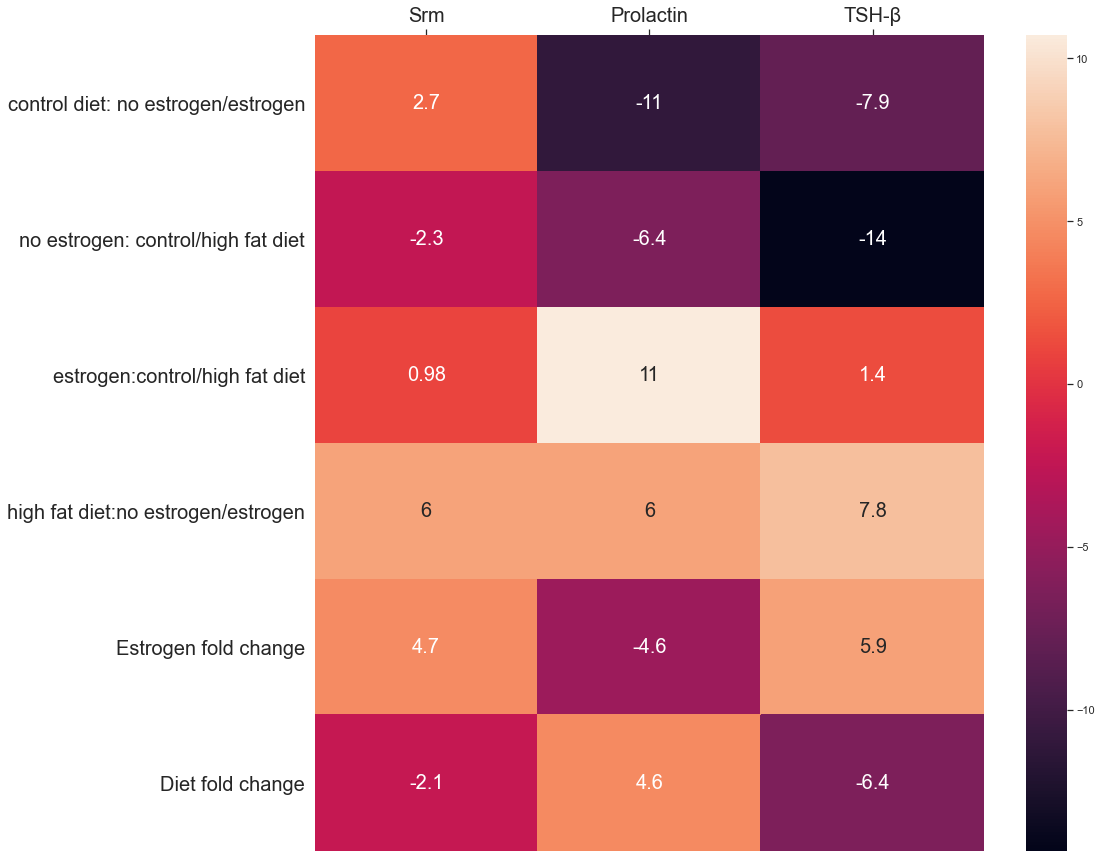

In [22]:
#create new dataframe with the genes you are interested in graphing in the heatmap
#add more (df.index == '<insert_gene_name1>') if needed, interspaced by |
blythespecificgenes=blythelabmulti[(blythelabmulti.index == 'Srm') | (blythelabmulti.index == 'Prl') 
       | (blythelabmulti.index == 'Tshb')]

#Combines absolute values from each column into a new column containing the total fold change of each gene
absolute_fold_change = blythelabmulti["H.log2(c.ovx/c.ove)"] + blythelabmulti["H.log2(c.ovx/h.ovx)"]+blythelabmulti["H.log2(c.ovx/h.ove)"]+blythelabmulti["H.log2(c.ove/h.ovx)"]+blythelabmulti["H.log2(c.ove/h.ove)"]+blythelabmulti['H.log2(h.ovx/h.ove)']
blythespecificgenes['absolute_fold_change'] = absolute_fold_change

#Sorts the dataset by total fold change in descending order
blythespecificgenes_sorted_by_change = blythespecificgenes.sort_values('absolute_fold_change', ascending = False)

#drop columns that we don't need to graph
j = blythespecificgenes_sorted_by_change.drop('absolute_fold_change', 1)
j = j.drop('name', 1)
j = j.drop('E.H.ppde', 1)
j = j.drop('D.H.ppde', 1)
j = j.drop('H.log2(c.ovx/h.ove)', 1)
j = j.drop('H.log2(c.ove/h.ovx)', 1)

plt.figure(figsize = (15,15))

#fill in the labels for the x ticks with the genes you want to graph
#add more '<insert_gene_name>' interspaced with commas between each gene as needed

ax=sns.heatmap(j.T,annot=True,annot_kws={"size": 20},xticklabels=['Srm','Prolactin','TSH-β'],
               yticklabels=['control diet: no estrogen/estrogen',
           'no estrogen: control/high fat diet',
          'estrogen:control/high fat diet',
          'high fat diet:no estrogen/estrogen',
          'Estrogen fold change',
          'Diet fold change'])
ax.xaxis.tick_top()
plt.xticks(size=20)        
plt.yticks(size = 20)

#Makes y-axis labels horizontal
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
plt.savefig('blythe_heatmap.png',bbox_inches = 'tight')

This is the heatmap we generated in the team analysis, we can see that TSH-β is significantly down-regulated in control diet without estrogen in comparison to high fat diet without estrogen. Prolactin is significantly upregulated in estrogen-treated mice on control diet compared to estrogen-treated mice on high fat diet. These are the kinds of genes that we can focus on as they likely play important functions in the hormonal and dietary pathways.

# Extension of bio187: dimensionality reduction and clustering

For each gene, there are 6 dimensions in our data sets. I can use t-SNE to reduce the dimensionality to 2, then use k-means to separate these data points with reduced dimensionality into distinct clusters.

In [14]:
# use same seed each time to get same tSNE results
import random

random.seed(10)
print(random.random())

# import packages
from sklearn.manifold import TSNE
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

0.5714025946899135


In [10]:
df = blythelabmulti[['H.log2(c.ovx/c.ove)','H.log2(c.ovx/h.ovx)','H.log2(c.ovx/h.ove)','H.log2(c.ove/h.ovx)','H.log2(c.ove/h.ove)','H.log2(h.ovx/h.ove)']].copy()

Perplexity measures how to balanece attention between the local and global aspects of the data. I will try a few different numbers to find a good perplexity value.

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 19601 samples in 0.033s...
[t-SNE] Computed neighbors for 19601 samples in 0.723s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19601
[t-SNE] Computed conditional probabilities for sample 2000 / 19601
[t-SNE] Computed conditional probabilities for sample 3000 / 19601
[t-SNE] Computed conditional probabilities for sample 4000 / 19601
[t-SNE] Computed conditional probabilities for sample 5000 / 19601
[t-SNE] Computed conditional probabilities for sample 6000 / 19601
[t-SNE] Computed conditional probabilities for sample 7000 / 19601
[t-SNE] Computed conditional probabilities for sample 8000 / 19601
[t-SNE] Computed conditional probabilities for sample 9000 / 19601
[t-SNE] Computed conditional probabilities for sample 10000 / 19601
[t-SNE] Computed conditional probabilities for sample 11000 / 19601
[t-SNE] Computed conditional probabilities for sample 12000 / 19601
[t-SNE] Computed conditional probabilities for sam

C:\Users\merri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 't-SNE perplexity of 20')

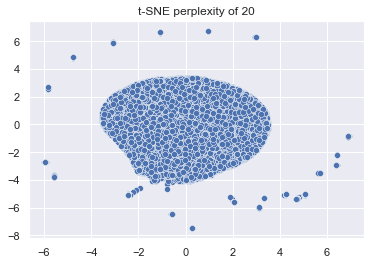

In [23]:
tsne20 = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=250)
tsne_results20 = tsne20.fit_transform(df)
sns.scatterplot(tsne_results20[:,0],tsne_results20[:,1])
plt.title('t-SNE perplexity of 20')

Looks like a perplexity of 20 is not separating the data into distinct clusters

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19601 samples in 0.038s...
[t-SNE] Computed neighbors for 19601 samples in 1.637s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19601
[t-SNE] Computed conditional probabilities for sample 2000 / 19601
[t-SNE] Computed conditional probabilities for sample 3000 / 19601
[t-SNE] Computed conditional probabilities for sample 4000 / 19601
[t-SNE] Computed conditional probabilities for sample 5000 / 19601
[t-SNE] Computed conditional probabilities for sample 6000 / 19601
[t-SNE] Computed conditional probabilities for sample 7000 / 19601
[t-SNE] Computed conditional probabilities for sample 8000 / 19601
[t-SNE] Computed conditional probabilities for sample 9000 / 19601
[t-SNE] Computed conditional probabilities for sample 10000 / 19601
[t-SNE] Computed conditional probabilities for sample 11000 / 19601
[t-SNE] Computed conditional probabilities for sample 12000 / 19601
[t-SNE] Computed conditional probabilities for sa

C:\Users\merri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 't-SNE perplexity of 50')

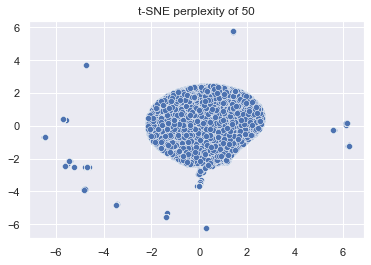

In [25]:
tsne50 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250)
tsne_results50 = tsne50.fit_transform(df)
sns.scatterplot(tsne_results50[:,0],tsne_results50[:,1])
plt.title('t-SNE perplexity of 50')

A perplexity of 50 does not create data points that are spread out

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 19601 samples in 0.036s...
[t-SNE] Computed neighbors for 19601 samples in 0.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19601
[t-SNE] Computed conditional probabilities for sample 2000 / 19601
[t-SNE] Computed conditional probabilities for sample 3000 / 19601
[t-SNE] Computed conditional probabilities for sample 4000 / 19601
[t-SNE] Computed conditional probabilities for sample 5000 / 19601
[t-SNE] Computed conditional probabilities for sample 6000 / 19601
[t-SNE] Computed conditional probabilities for sample 7000 / 19601
[t-SNE] Computed conditional probabilities for sample 8000 / 19601
[t-SNE] Computed conditional probabilities for sample 9000 / 19601
[t-SNE] Computed conditional probabilities for sample 10000 / 19601
[t-SNE] Computed conditional probabilities for sample 11000 / 19601
[t-SNE] Computed conditional probabilities for sample 12000 / 19601
[t-SNE] Computed conditional probabilities for sam

C:\Users\merri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 't-SNE perplexity of 5')

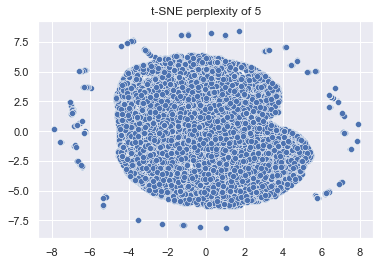

In [26]:
tsne5 = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=250)
tsne_results5 = tsne5.fit_transform(df)
sns.scatterplot(tsne_results5[:,0],tsne_results5[:,1])
plt.title('t-SNE perplexity of 5')

Text(0.5, 1.0, '5 clusters, perplexity of 20')

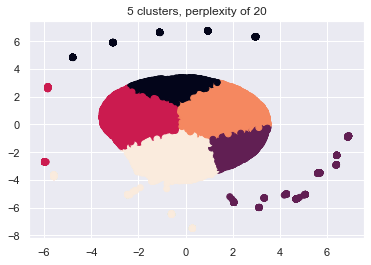

In [28]:
kmeans = KMeans(n_clusters=5, random_state=40).fit(tsne_results20)
C = kmeans.cluster_centers_
#plt.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=500)
plt.scatter(tsne_results20[:,0],tsne_results20[:,1],c=kmeans.labels_)    
plt.title('5 clusters, perplexity of 20')
#plt.savefig('run2_13_clusters_perplexity_20.png')

Text(0.5, 1.0, '5 clusters, perplexity of 50')

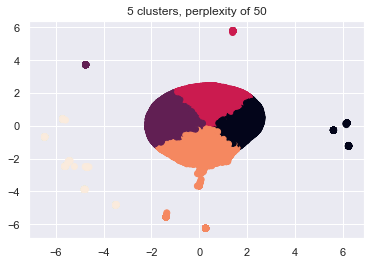

In [29]:
kmeans = KMeans(n_clusters=5, random_state=40).fit(tsne_results50)
C = kmeans.cluster_centers_
#plt.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=500)
plt.scatter(tsne_results50[:,0],tsne_results50[:,1],c=kmeans.labels_)
plt.title('5 clusters, perplexity of 50')
#plt.savefig('run2_13_clusters_perplexity_20.png')

Text(0.5, 1.0, '5 clusters, perplexity of 5')

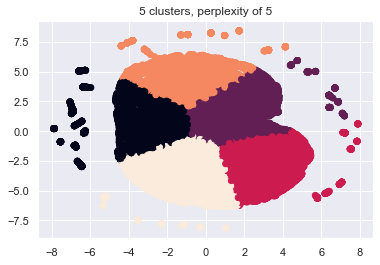

In [30]:
kmeans = KMeans(n_clusters=5, random_state=40).fit(tsne_results5)
C = kmeans.cluster_centers_
#plt.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=500)
plt.scatter(tsne_results5[:,0],tsne_results5[:,1],c=kmeans.labels_)
plt.title('5 clusters, perplexity of 5')
#plt.savefig('run2_13_clusters_perplexity_20.png')